# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#Updated

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#list of cites
cities

#Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = requests.get(query_url + city).json()
# city_url
# # print(json.dumps(city_url, indent=4, sort_keys=True))
# # city_url

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get the JSON response from the OpenWeatherMap API
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | nagar karnul
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | lucapa
Processing Record 5 of Set 1 | jabor
Processing Record 6 of Set 1 | manokwari
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | kiruna
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | alaghsas
Processing Record 12 of Set 1 | kasama
Processing Record 13 of Set 1 | djamaa
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | stawell
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | puerto lempira
Processing Record 19 of Set 1 | brits
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | kudahuvadhoo
Processing Record 22 of Set 1 | vilyuchinsk
Processing Record 23 of Set 1 | fuvahm

In [30]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df['City'].count()

573

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925
1,nagar karnul,16.4821,78.3247,16.98,83,59,3.32,IN,1703029944
2,adamstown,-25.0660,-130.1015,23.03,77,96,7.40,PN,1703029929
3,lucapa,-8.4192,20.7447,19.44,91,100,1.10,AO,1703029945
4,jabor,5.9210,169.6434,27.87,81,100,10.38,MH,1703029945


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925
1,nagar karnul,16.4821,78.3247,16.98,83,59,3.32,IN,1703029944
2,adamstown,-25.0660,-130.1015,23.03,77,96,7.40,PN,1703029929
3,lucapa,-8.4192,20.7447,19.44,91,100,1.10,AO,1703029945
4,jabor,5.9210,169.6434,27.87,81,100,10.38,MH,1703029945


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

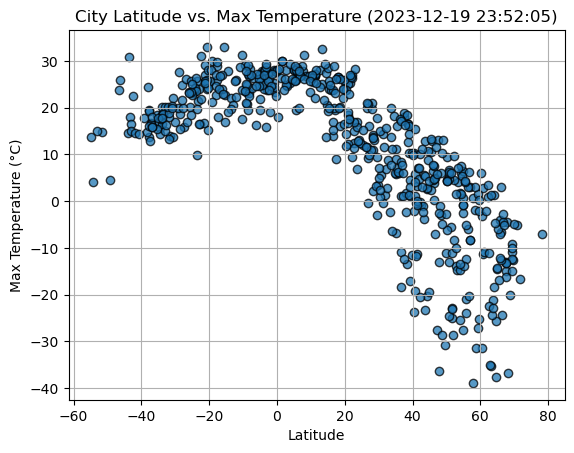

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

#covert date column
# city_data_df["Date"] = pd.to_datetime(city_data_df['Date'], unit='s')
city_date_covert = pd.to_datetime(city_data_df['Date'], unit='s')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()



In [10]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925


#### Latitude Vs. Humidity

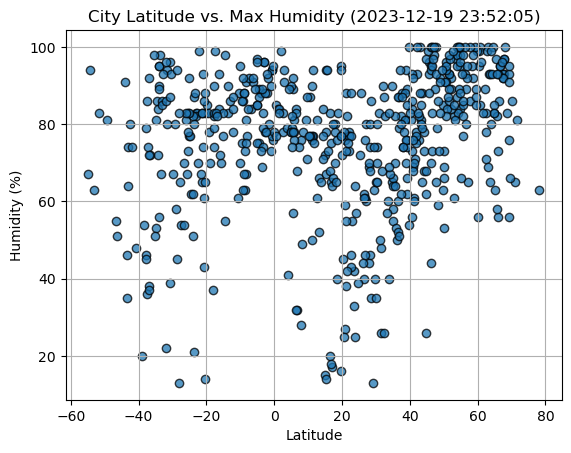

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
city_date

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Humidity ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [12]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925


#### Latitude Vs. Cloudiness

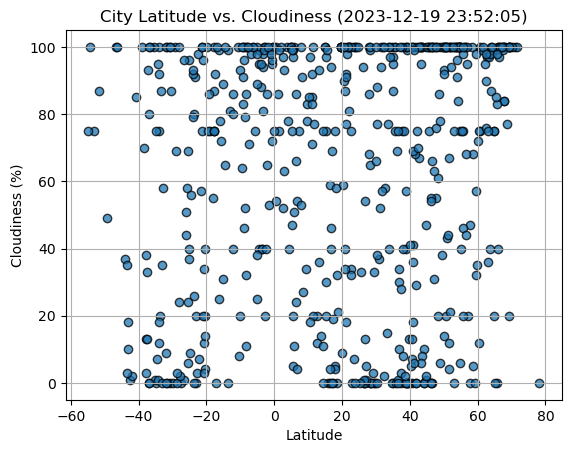

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
city_date


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

In [14]:
city_data_df.head(1)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925


#### Latitude vs. Wind Speed Plot

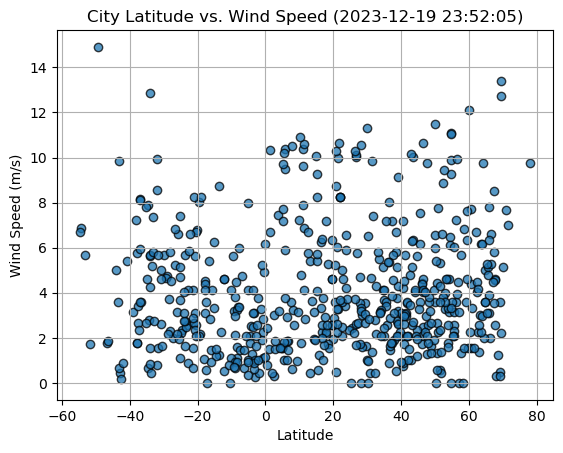

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
city_date

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_date_covert[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
#Function to create Linear Plots
# Create Plot
def liner_regression_plts(x_values, y_values, y_label, annotation_coords=(10, -30),title=""):
    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
        
    # Create scatter plot
    plt.scatter(x_values, y_values, label='Data points')

    #Line Equasion
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)  
        
    # Create regression line plot
    plt.plot(x_values, regress_values, color='red', label='Linear Regression')
    plt.title(title)    
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq, annotation_coords, fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()

In [17]:
northern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nagar karnul,16.4821,78.3247,16.98,83,59,3.32,IN,1703029944
4,jabor,5.9210,169.6434,27.87,81,100,10.38,MH,1703029945
6,bubaque,11.2833,-15.8333,26.85,50,71,6.86,GW,1703029945
8,kiruna,67.8557,20.2251,-4.49,93,100,2.57,SE,1703029945
9,bethel,41.3712,-73.4140,3.17,61,100,3.09,US,1703029946


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nagar karnul,16.4821,78.3247,16.98,83,59,3.32,IN,1703029944
4,jabor,5.9210,169.6434,27.87,81,100,10.38,MH,1703029945
6,bubaque,11.2833,-15.8333,26.85,50,71,6.86,GW,1703029945
8,kiruna,67.8557,20.2251,-4.49,93,100,2.57,SE,1703029945
9,bethel,41.3712,-73.4140,3.17,61,100,3.09,US,1703029946


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df)[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.54,91,37,4.99,NZ,1703029925
2,adamstown,-25.0660,-130.1015,23.03,77,96,7.40,PN,1703029929
3,lucapa,-8.4192,20.7447,19.44,91,100,1.10,AO,1703029945
5,manokwari,-0.8667,134.0833,27.97,73,99,1.92,ID,1703029945
7,papatowai,-46.5619,169.4708,23.74,55,100,1.75,NZ,1703029943


###  Temperature vs. Latitude Linear Regression Plot

y = -0.69x +31.4
The r-value is: 0.654265553647583


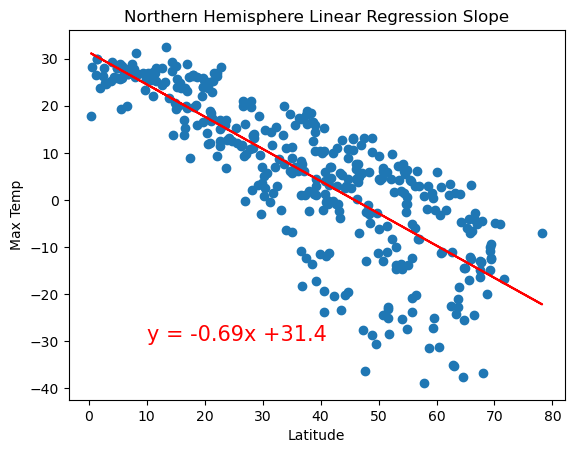

In [20]:
liner_regression_plts(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temp", (10, -30),"Northern Hemisphere Linear Regression Slope")

y = 0.23x +27.03
The r-value is: 0.37784749862211425


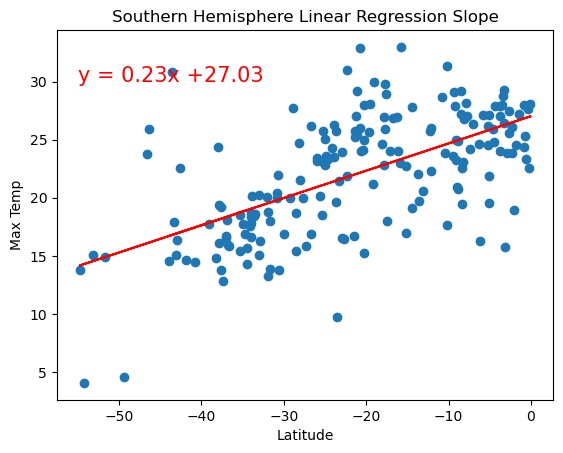

In [21]:
liner_regression_plts(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp",(-55,30),"Southern Hemisphere Linear Regression Slope")

**Discussion about the linear relationship:** The closer citites are to the equator, the hotter it gets The futher away from the equator, the colder it gets as their max temps lower. This is consistent for both Southern and Northern Hemispheres



### Humidity vs. Latitude Linear Regression Plot

y = 0.36x +62.35
The r-value is: 0.1366387350720504


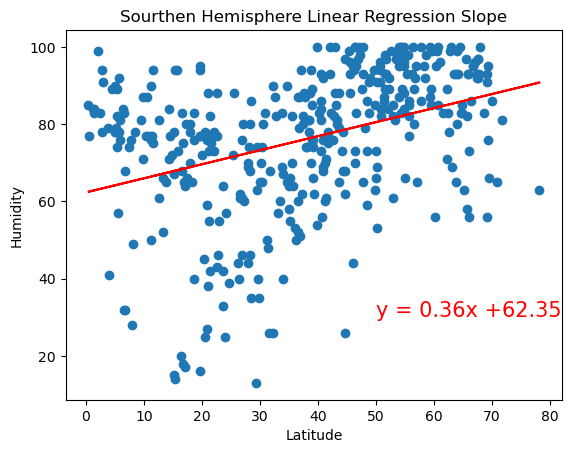

In [22]:
liner_regression_plts(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity",(50,30),"Sourthen Hemisphere Linear Regression Slope")

y = 0.42x +84.86
The r-value is: 0.10386010062901178


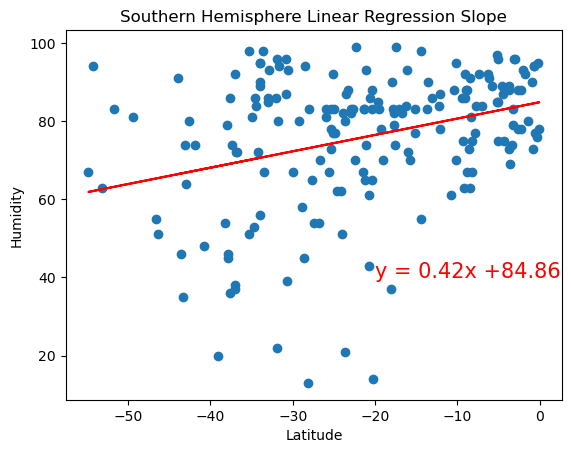

In [23]:
liner_regression_plts(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity",(-20,40),"Southern Hemisphere Linear Regression Slope")

**Discussion about the linear relationship:** This plot line regression patterns of Cloudiness in the Northern and Southern Hemispheres appear to follow the same trends as Humidity. The more humid it tends to be more cloudy

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.28x +52.09
The r-value is: 0.018744342562150226


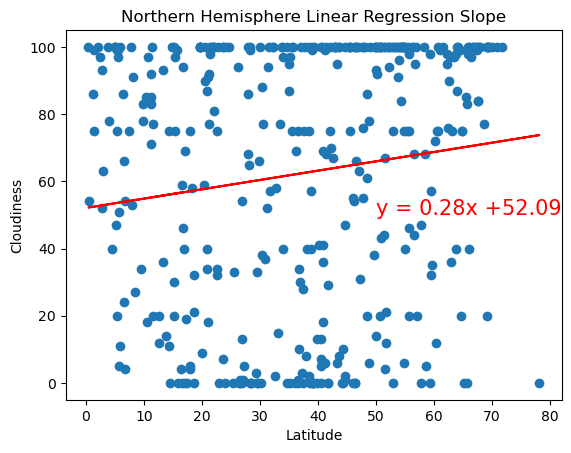

In [24]:
liner_regression_plts(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness",(50,50),"Northern Hemisphere Linear Regression Slope")

y = 0.82x +77.49


The r-value is: 0.08826962229117807


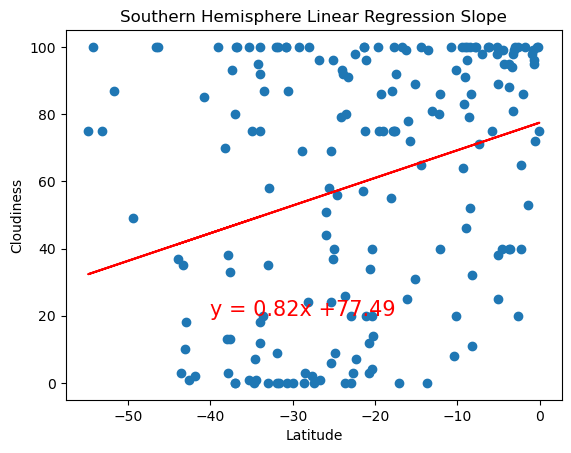

In [25]:
liner_regression_plts(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness",(-40,20),"Southern Hemisphere Linear Regression Slope")

**Discussion about the linear relationship:** The clouds and humidity are in sync. The more humid it is, the more clouds may be produced. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x +4.09
The r-value is: 0.00023669596829851926


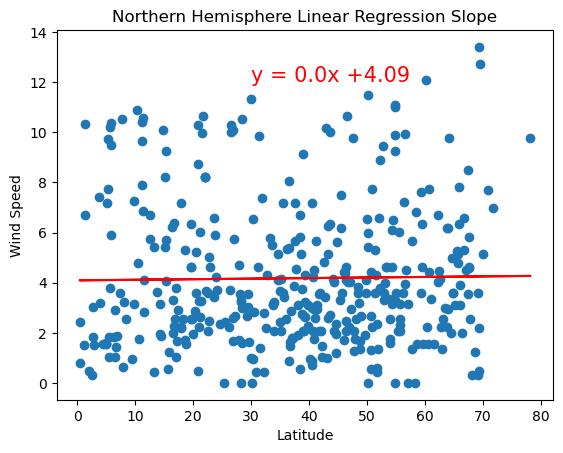

In [26]:
liner_regression_plts(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed",(30,12),"Northern Hemisphere Linear Regression Slope")

y = -0.06x +2.25
The r-value is: 0.10338287914787371


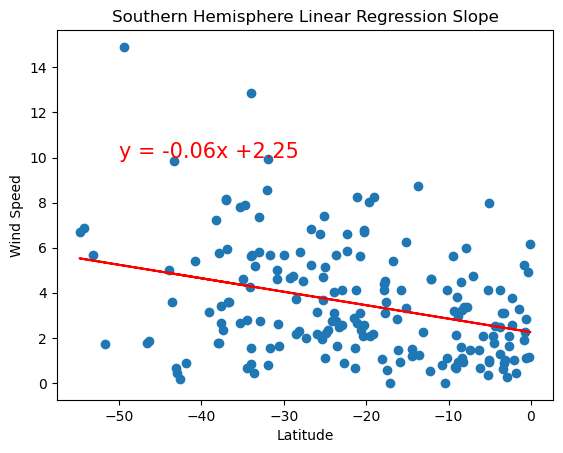

In [27]:
liner_regression_plts(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed",(-50,10),"Southern Hemisphere Linear Regression Slope")

**Discussion about the linear relationship:** The more north you go, the more wind you will have!